국내 기상청 수원지점 ASOS 데이터 사용

In [1]:
from Suwon_ASOS_data.load_data import load_data

train_data, valid_data, test_data = load_data()

Persistence Model
```
f(x+1) = f(x)
```

In [10]:
# f(t1) = f(t0)
t1 = test_data['solar_radiation'].shift(1)
t0 = test_data['solar_radiation']

In [15]:
import numpy as np

np.mean(abs(t1 - t0)) # 1시간 후 예측 오차

np.float64(0.2003151044639799)

In [16]:
t2 = test_data['solar_radiation'].shift(2)
np.mean(abs(t2 - t0))

np.float64(0.3625827814569536)

In [17]:
t24 = test_data['solar_radiation'].shift(24) # 24시간 후 
np.mean(abs(t24 - t0))

np.float64(0.23277358058608058)

In [18]:
t48 = test_data['solar_radiation'].shift(48) # 48시간 후
np.mean(abs(t48 - t0))

np.float64(0.27531795224977046)

평가 지표 MAE 기준으로
- 1시간 후 예측 성능 0.200
- 24시간 후 예측 성능 0.233
- 48시간 후 예측 성능 0.275

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def cal_mae():
    t_0 = test_data['solar_radiation']
    result = []
    for ii in range(48):
        t_after = test_data['solar_radiation'].shift(ii+1)
        result.append(np.mean(abs(t_after - t_0)))
    return result

+1H ~ +48H 결과 그래프

<Axes: >

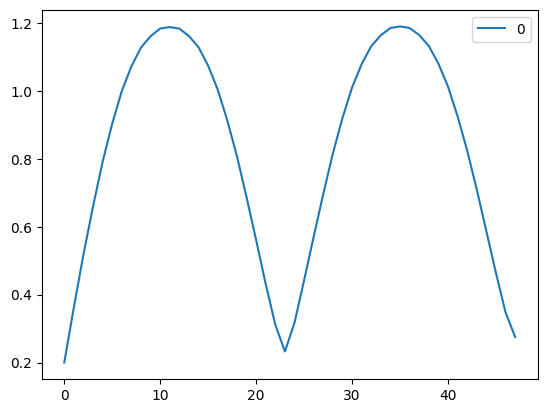

In [26]:
import pandas as pd

results = pd.DataFrame(cal_mae())

sns.lineplot(data=results)